In [94]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import *

tf.__version__
keras.__version__


'2.4.0'

In [6]:
import tensorflow.keras.datasets.imdb as imdb

In [7]:
help(imdb)

Help on package tensorflow.keras.datasets.imdb in tensorflow.keras.datasets:

NAME
    tensorflow.keras.datasets.imdb - IMDB sentiment classification dataset.

PACKAGE CONTENTS


FILE
    /Users/haoxuefeng/miniconda2/envs/work/lib/python3.6/site-packages/tensorflow/keras/datasets/imdb/__init__.py




In [21]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(
    num_words=10000)


In [22]:
np.unique(train_labels)
train_data.shape
train_data[0]
len(train_data[0])
len(train_data[1])

189

In [23]:
max([max(s) for s in train_data])

9999

In [32]:
w_to_i = imdb.get_word_index()
i_to_w = dict(
    [(value,key) for (key,value) in w_to_i.items()]
)

In [39]:
i_to_w[1]
decode_review = ''.join([i_to_w.get(i-3, '?')+' ' for i in train_data[0]])
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [48]:
def transform_data(data, dimension = 10000):
    embeding = np.zeros((len(data), dimension))
    '''
    for s_i in range(len(data)):
        sentence = data[s_i]
        for word_i in sentence:
            embeding[s_i][word_i] = 1
    '''
    for (i,sentence_i_list) in enumerate(data):
        embeding[i, sentence_i_list] = 1
    return embeding

In [62]:
x_train = transform_data(train_data)
x_test  = transform_data(test_data)

In [63]:
#x = np.zeros((3,4))
#x[1,[2,3]] = 1
#x

In [64]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [105]:
network = models.Sequential()
network.add(layers.Dense(100,activation='relu',input_shape=(10000,)))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer=optimizers.RMSprop(lr=0.001), 
                loss='mse', 
                metrics=['accuracy'])
fit_result = network.fit(transform_data(train_data),
                         y_train, 
                         epochs=20, 
                         batch_size=512,
                         validation_data=(x_test, y_test)
                        )

Epoch 1/20
49/49 [==============================] - 5s 111ms/step - loss: 0.1521 - accuracy: 0.7909 - val_loss: 0.1011 - val_accuracy: 0.8764
Epoch 2/20
49/49 [==============================] - 2s 42ms/step - loss: 0.0769 - accuracy: 0.9057 - val_loss: 0.0939 - val_accuracy: 0.8738
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0573 - accuracy: 0.9289 - val_loss: 0.0876 - val_accuracy: 0.8826
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0449 - accuracy: 0.9453 - val_loss: 0.0979 - val_accuracy: 0.8702
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0337 - accuracy: 0.9608 - val_loss: 0.0974 - val_accuracy: 0.8716
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0260 - accuracy: 0.9701 - val_loss: 0.1187 - val_accuracy: 0.8512
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.0212 - accuracy: 0.9754 - val_loss: 0.0976 - val_accuracy: 0.8741
Epoch 8/20
4

In [78]:
#?network.fit

In [106]:
history = fit_result.history

In [107]:
#history.keys()
#history.items()

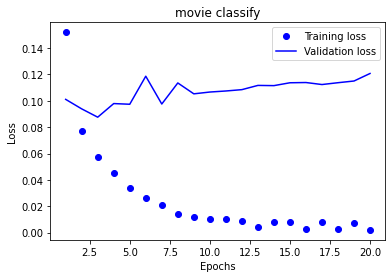

In [108]:
loss_values = history['loss']
val_loss_values = history['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('movie classify')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

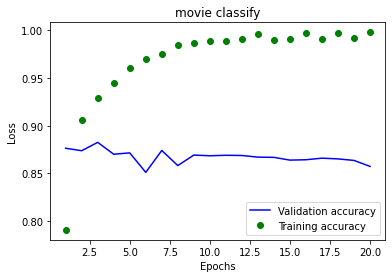

In [109]:
plt.clf()
acc_values = history['accuracy']
test_acc_values = history['val_accuracy']
epochs = range(1, len(acc_values)+1)
plt.plot(epochs, test_acc_values, 'b', label='Validation accuracy')
plt.plot(epochs, acc_values, 'bo',color='green', label='Training accuracy')
plt.title('movie classify')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [100]:
?plt.plot